22-May-23 11:05:09: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_5min/1999/
22-May-23 11:05:10: File is current: omni_data/hro2_5min/1999/omni_hro2_5min_19991001_v01.cdf
22-May-23 11:05:11: Time clip returns full data set.
22-May-23 11:05:11: Time clip returns full data set.
22-May-23 11:05:11: Time clip returns full data set.
22-May-23 11:05:11: Time clip returns full data set.
22-May-23 11:05:11: Time clip returns full data set.
22-May-23 11:05:11: Time clip returns full data set.
22-May-23 11:05:11: Time clip returns full data set.
22-May-23 11:05:11: Time clip returns full data set.
22-May-23 11:05:11: Time clip returns full data set.
22-May-23 11:05:11: Time clip returns full data set.
22-May-23 11:05:11: Time clip returns full data set.
22-May-23 11:05:11: Time clip returns full data set.
22-May-23 11:05:11: Time clip returns full data set.
22-May-23 11:05:11: Time clip returns full data set.
22-May-23 11:05:11: Time clip returns full data s

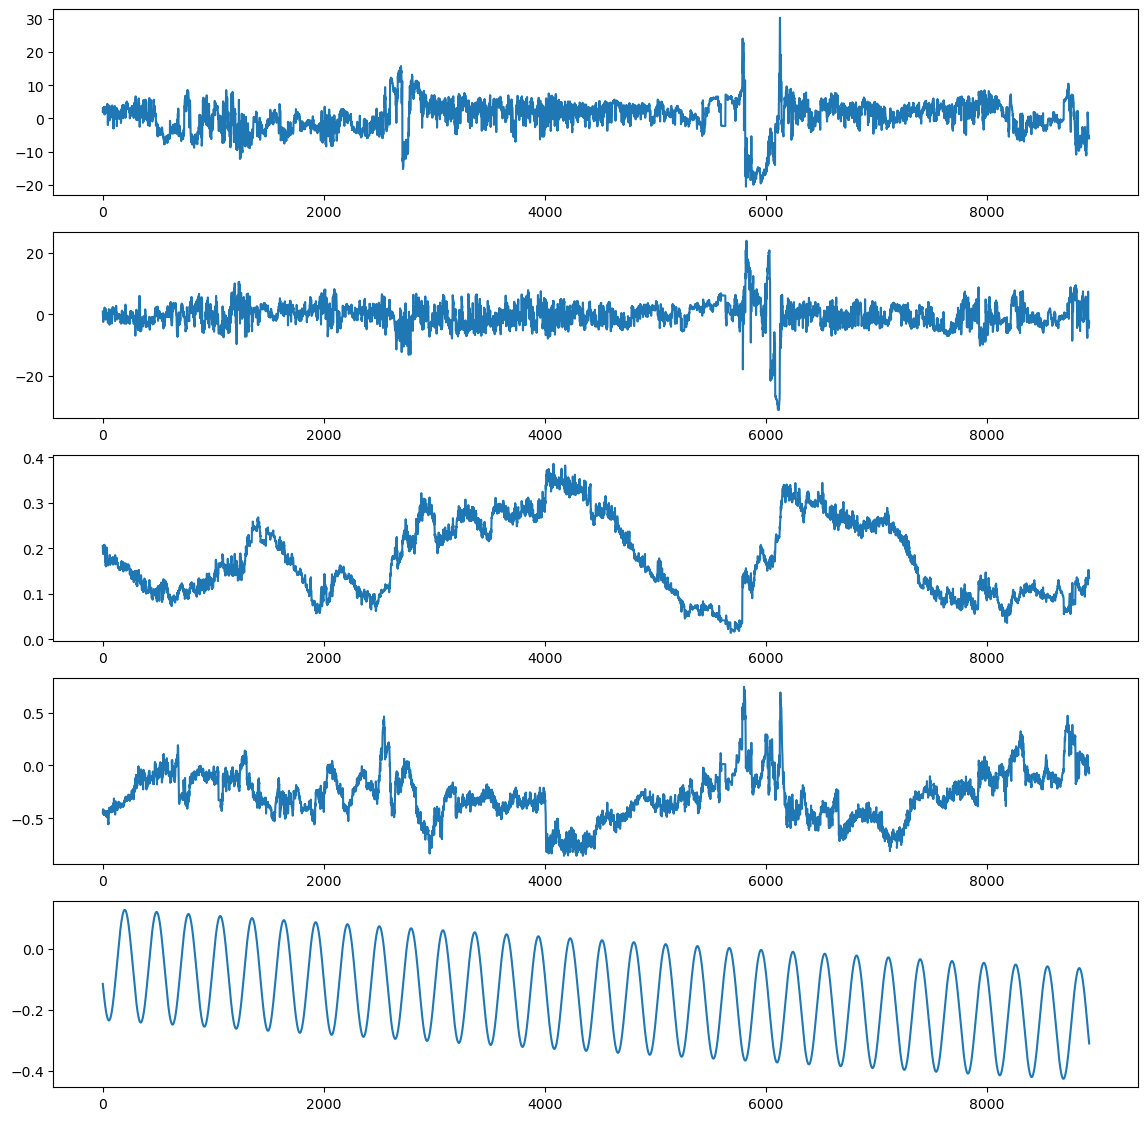

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pyspedas
from geopack import geopack
from pytplot import tplot
from pytplot import get_data
import pandas as pd
import pickle

omni_vars = pyspedas.omni.data(trange=['1999-10-1', '1999-11-1'],datatype='5min')

byo=get_data( 'BY_GSM')
bzo=get_data( 'BZ_GSM')
vvo=get_data( 'flow_speed')
nno=get_data( 'proton_density')

alo=get_data( 'AL_INDEX')
auo=get_data( 'AU_INDEX')
alp=pd.DataFrame(alo.y)
aup=pd.DataFrame(auo.y)

tto=byo.times
tlt2=np.zeros(tto.shape[0])

for ii in range(0,tto.shape[0]):
    ut = tto[ii]
    ps = geopack.recalc(ut)
    tlt2[ii]=ps

byp=pd.DataFrame(byo.y)
byp2=byp.fillna(method="ffill")

bzp=pd.DataFrame(bzo.y)
bzp2=bzp.fillna(method="ffill")

vvp=pd.DataFrame(vvo.y)
vvp2=vvp.fillna(method="ffill")

vvp2=np.log10(vvp2)-2.5

nnp=pd.DataFrame(nno.y)
nnp2=nnp.fillna(method="ffill")

nnp2=np.log10(nnp2)-1.0

fig = plt.figure(figsize=(14, 14))
    
ax1 = fig.add_subplot(511)
ax1.plot(byp2)

ax2 = fig.add_subplot(512)
ax2.plot(bzp2)
    
ax3 = fig.add_subplot(513)
ax3.plot(vvp2)

ax4 = fig.add_subplot(514)
ax4.plot(nnp2)

ax5 = fig.add_subplot(515)
ax5.plot(tlt2)


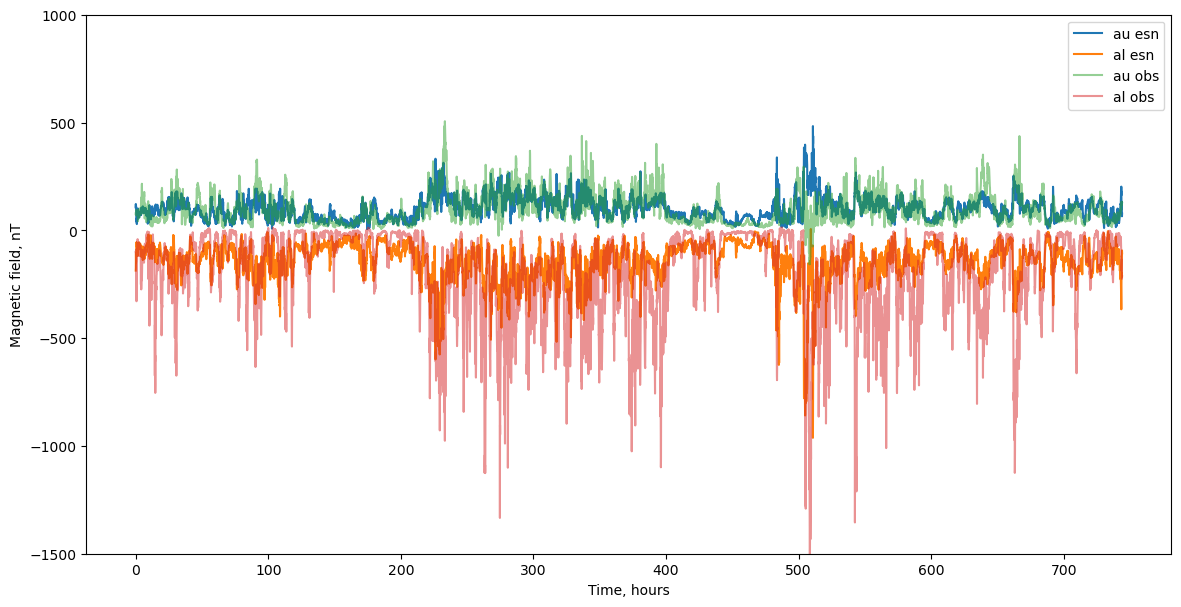

In [4]:
cmap0,unit0,f0,cb_min, cb_max,cb_div  ='PiYG','kV',1e-3, -100,100,20 #kilo volt

cmap1,unit1,f1,cb_min1, cb_max1,cb_div1  ='magma','A/km',1e3, 0,500,20 #A/km

theta=np.array([ 0.0, 11.25, 22.5, 33.75, 45.0, 56.25, 67.5, 78.75,
       90.0, 101.25, 112.5, 123.75, 135.0, 146.25, 157.5, 168.75, 
       180.0, 191.25, 202.5, 213.75, 225.0, 236.25, 247.5, 258.75, 
       270.0, 281.25, 292.5, 303.75, 315.0, 326.25, 337.5, 348.75, 360.0])

#normal grid lon
theta=np.array([  1.688 ,   6.188 ,  10.688 ,  15.188 ,  19.688 ,  24.188 ,  28.688 ,  33.188 ,  37.688 ,  42.188,
                46.688 ,  51.188 ,  55.688 ,  60.188 ,  64.688 ,  69.188 ,  73.688 ,  78.188 ,  82.688 ,  87.188,
                91.688 ,  96.188 , 100.688 , 105.188 , 109.688 , 114.188 , 118.688 , 123.188 , 127.688 , 132.188,
                136.688 , 141.188 , 145.687 , 150.188 , 154.688 , 159.188 , 163.688 , 168.187 , 172.687 , 177.187,
                181.687 , 186.187 , 190.687 , 195.187 , 199.687 , 204.187 , 208.687 , 213.187 , 217.687 , 222.187,
                226.687 , 231.187 , 235.687 , 240.187 , 244.687 , 249.187 , 253.687 , 258.187 , 262.687 , 267.187,
                271.687 , 276.187 , 280.687 , 285.187 , 289.687 , 294.187 , 298.687 , 303.187 , 307.687 , 312.187,
                316.687 , 321.187 , 325.687 , 330.187 , 334.687 , 339.187 , 343.687 , 348.187 , 352.687 , 357.187, 367.688])

theta=theta-90.
theta=theta/360*np.pi*2

#north
r=np.array([53.109 ,  55.172 ,  57.234 ,  59.297 ,  61.359 ,  63.422 ,  65.484 ,  66.783 ,  67.826 ,  68.870,
            69.913 ,  70.957 ,  72.000 ,  73.044 ,  74.087 ,  75.130 ,  76.174 ,  77.217 ,  78.261 ,  79.304,
            80.348 ,  81.391 ,  82.435 ,  83.478 ,  84.522 ,  85.565 ,  86.609 ,  87.652 ,  88.696 ,  89.739])
r=90-r

#pot delta lat north
dn=np.array([ 2.063 ,   2.063 ,   2.063 ,   2.063 ,   2.063 ,   2.063 ,   1.808 ,   1.043 ,   1.044 ,   1.043,
             1.044 ,   1.043 ,   1.044 ,   1.043 ,   1.043 ,   1.043 ,   1.044 ,   1.044 ,   1.043 ,   1.043,
             1.043 ,   1.043 ,   1.044 ,   1.043 ,   1.044 ,   1.043 ,   1.043 ,   1.043 ,   1.043 ,  1.043])

dn=dn*3.141592*2./360.0


#dn=6378.0*dn*2.0 #km
dn=6378.0*(dn+np.roll(dn,-1,axis=0))#km


#pot delta north
de=np.array([   0.04715 ,    0.04486 ,    0.04251 ,    0.04010 ,    0.03765 ,    0.03514 ,    0.03259 ,    0.03096 ,    0.02964 ,    0.02831,
             0.02697 ,    0.02563 ,    0.02427 ,    0.02291 ,    0.02153 ,    0.02015 ,    0.01877 ,    0.01738 ,    0.01598 ,    0.01458,
                0.01317 ,    0.01176 ,    0.01034 ,    0.00892 ,    0.00750 ,    0.00607 ,    0.00465 ,    0.00322 ,    0.00179 ,    0.00036])

de=6378.0*(de+np.roll(de,-1,axis=0))#km

th1=np.ones(81)
tt9, ee = np.meshgrid(th1,de) 
tt9, nn = np.meshgrid(th1,dn) 


all10 = np.vstack((tlt2.T,byp2.T,bzp2.T,vvp2.T,nnp2.T))
data_s = all10.T

flearn=1e-6 #for pot and fac
modelp = pickle.load(open('modelp099_250.sav','rb'))
test_Y = modelp.predict(data_s)
pcap = test_Y/flearn

flearn=1e-3 #for sigma
modelw = pickle.load(open('modelw099_300.sav','rb'))
test_Y = modelw.predict(data_s)
pcaw=test_Y/flearn


meanw=np.load('meanw.npy')
imgpcaw=np.load('imgw.npy')
datpcaw=pcaw

xy=np.dot(datpcaw,imgpcaw)+meanw

meanp=np.load('meanp.npy')
imgpcap=np.load('imgp.npy')
datpcap=pcap

p=np.dot(datpcap,imgpcap)+meanp


nmax=tto.shape[0]
iarr=np.arange(nmax)

au=np.zeros(nmax)
al=np.zeros(nmax)


for i in iarr:

    iii=i

    z = p[iii].reshape(30,80)*f0 #Volt

    sxy = xy[iii].reshape(30,80) 
    sxy2 = np.append(sxy, sxy[:, 0:1], axis=1)

    dzn=np.roll(z,-1,axis=0)-np.roll(z,1,axis=0) #minus Ex
    dze=np.roll(z,-1,axis=1)-np.roll(z,-1,axis=1) #minus Ey

    z2 = np.append(z, z[:, 0:1], axis=1)
    zn2 = np.append(dzn, dzn[:, 0:1], axis=1)
#    ze2 = np.append(dze, dze[:, 0:1], axis=1)

#    hall=(-zn2/nn*sxy2)*f1
    hall2=(zn2/nn*sxy2)*f1

    au[i]=np.max(hall2[5:12,:])
    al[i]=np.min(hall2[5:12,:])    


x=np.arange(nmax)*5./60.

fig = plt.figure(figsize=(14, 7))
    
ax1 = fig.add_subplot(111)
ax1.plot(x,au, label='au esn')
ax1.plot(x,al, label='al esn')
ax1.plot(x,aup, label='au obs',alpha=0.5)
ax1.plot(x,alp, label='al obs',alpha=0.5)
ax1.set_ylim(-1500,1000)
ax1.set_ylabel('Magnetic field, nT')
ax1.set_xlabel('Time, hours')
ax1.legend()            
